# Homework2: Variational inference and VAE

## Task 1: Theory (5pt)

### Problem 1: Log-derivative trick (1pt)

In Lecture 3 we encountered a problem with Monte Carlo estimation during deriving the ELBO gradient at the E-step of EM-algorithm. Our density function $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ depends on the gradient parameters $\boldsymbol{\phi}$.
\begin{align*}
    \nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
    & \neq  \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}} \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
\end{align*}
The Reparametrization trick allowed us to pass the gradient inside the integral and get a Monte Carlo estimate. 

However, there is another way to achive this. It is called **log-derivative trick**:
$$
    \nabla_\xi  \log q(\eta| \xi) = \frac{\nabla_\xi q(\eta| \xi)}{q(\eta| \xi)}.
$$

1. Get the Monte Carlo estimate of the gradient using the formula for the derivative of the logarithm.

2. The final expression often works significantly worse than the reparametrization trick. Namely, it has a huge variance. Try to describe the intuition why the evaluation has a high variance (you need to think about what order and sign the terms in the expression will have).

```
your solution
```

### Problem 2: IWAE theory (1pt)

In Lecture 4 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
$$

Here we had the theorem without proof:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

Now it is time to prove it :)

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


```
your solution
```

### Problem 3: EM-algorithm for GMM (3pt)

**Do not worry:** the task is long-written, but it is very useful for the understanding of the EM-algorithm and it is not very hard :)

Recall the Gaussian Mixture Model (GMM) we discussed in Seminar 4: 

- model parameters $\boldsymbol{\theta} = \{ \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \boldsymbol{\Sigma}_{1:K} \}$;

- prior distribution (note that here it also depends on $\boldsymbol{\theta}$) $p(z | \boldsymbol{\theta}) = \text{Categorical}(\pi_1, \dots \pi_K)$;

- generative distribution $p(\mathbf{x} | z, \boldsymbol{\theta}) = \mathcal{N}\left(\mathbf{x}|, \boldsymbol{\mu}_z, \boldsymbol{\Sigma}_z\right)$.

Given samples $\boldsymbol{X} = \{\mathbf{x}_1, \dots, \mathbf{x}_n\} \sim p(\mathbf{x})$ , $\mathbf{x}_i \in \mathbb{R}^m$ we want to fit GMM model via **MLE**:

$$
\boldsymbol{\theta}^{*} = \arg\max\limits_{\boldsymbol{\theta}} \log p(\boldsymbol{X} | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}}\sum\limits_{i = 1}^{n} \log \left(\sum\limits_{k = 1}^{K}  \pi_k \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right).
$$

The direct solution of the problem above is hard and we substitute **MLE** optimization with **ELBO** optimization:

$$
\boldsymbol{\theta}^{\#} = \arg\max\limits_{q, \boldsymbol{\theta}} \mathcal{L}(q, \boldsymbol{\theta}) = \arg\max\limits_{q, \boldsymbol{\theta}} \int\limits_{Z^n} q(z_1, \dots, z_n) \log\frac{ p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) }{ q(z_1, \dots, z_n) } \prod\limits_{i = 1}^{n} d z_i.
$$

Since the pairs $(\mathbf{x}_1, z_1), \dots ,(\mathbf{x}_N, z_n)$ are mutually independent, the distributions could be factorized:
$$
    q(z_1, \dots, z_n) = \prod_{i=1}^n q(z_i); \quad p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) = \prod_{i=1}^n p(\mathbf{x}_i, z_i | \boldsymbol{\theta}).
$$
$$
\mathcal{L}(q, \boldsymbol{\theta}) = \sum\limits_{i = 1}^{n} \int\limits_{Z} q(z_i) \log\frac{ p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) }{ q(z_i) } d z_i.
$$

In the equations above we treet $q(\cdot)$ as continuous density function. In our case $q(\cdot)$ is discrete categorical distribution and all integrals are substituted with the corresponding sums: 

$$
\int\limits_{Z} f(z) q(z) dz \longrightarrow \sum\limits_{k = 1}^{K} f(k) q(\{z = k\}).
$$

**ELBO** optimization could be done via EM-algorithm:

#### EM-algorithm

* **E-step**

    $$
    q(z_i) = p(z_i | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}).
    $$
    
    Note, that $q(z_i)$ is a categorical distribution over $K$ components: $q(z_i) = \text{Categorical}(\xi_1^i, \xi_2^i, \dots \xi_K^i)$.

* **M-step**

    $$
    \boldsymbol{\theta}^{\text{new}} = \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} E_{z_i \sim q(z_i)} \log p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}).
    $$
    
#### E- and M- steps derivations
    
Recall the derivation of **E-step** from the class:

$$
q(\{z_i = k\}) = \xi_k^i = p(\{z = k\} | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}) \overset{\text{Bayes theorem}}{=} \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum\limits_{k' = 1}^{K} \pi_{k'} \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_{k'}, \boldsymbol{\Sigma}_{k'})}.
$$

**M-step** is a bit harder. Let's denote

$$ 
\Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) := \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}) =\\= \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \left(\log \pi_k - \frac{m}{2} \log 2 \pi - \frac{1}{2} \log \det \boldsymbol{\Sigma}_k - \frac{1}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k)\right).
$$

Let's maximize $\Phi(\cdot)$ with respect to parameters $\boldsymbol{\pi}_{1:K}$, $\boldsymbol{\mu}_{1:K}$, $\boldsymbol{\Sigma}_{1:K}$ separately:

1. Maximization with respect to $\boldsymbol{\pi}_{1:K}$:
$$
\arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \log \pi_k = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{k = 1}^{K} \log \left(\pi_k \right) \sum\limits_{i = 1}^{n} \xi_k^i.
$$

    **Subproblem 3.1 (1.5pt):** Prove, that the $\arg\max$ problem above has solution $\pi_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \xi_k^i}{n}$, $k \in 1, 2, \dots K$.
    
2. Maximization with respect to $\boldsymbol{\mu}_{1:K}$. Let's take the derivative:
$$
\frac{\partial}{\partial \boldsymbol{\mu}_k} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \frac{\partial}{\partial \boldsymbol{\mu}_k} \sum\limits_{i = 1}^{n} - \frac{\xi_{k}^{i}}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k) = \sum\limits_{i = 1}^{n} \left(\boldsymbol{\Sigma}_k^{-1} \mathbf{x}_i - \boldsymbol{\Sigma}_k^{-1} \boldsymbol{\mu}_k\right) \xi_k^i = \boldsymbol{\Sigma}_k^{-1} \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0.
$$

    Since $\boldsymbol{\Sigma}_k^{-1}$ is positive definite, the equation above could be written as follows:
    
    $$
    \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0 \quad \Rightarrow \quad \boldsymbol{\mu}_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \mathbf{x}_i \xi_k^i}{\sum\limits_{i = 1}^{n} \xi_k^i}.
    $$
    
3. Maximization with respect to $\boldsymbol{\Sigma}_{1:K}$.

    **Subproblem 3.2 (1.5pt):** Prove, that  
    $$
    \boldsymbol{\Sigma}^{\text{new}}_k = \frac{1}{\sum\limits_{i = 1}^{n} \xi_k^i} \sum\limits_{i = 1}^{n} \xi_{k}^{i} \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right) \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right)^T.
    $$

    *Hint 1*: $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.
    
    *Hint 2*: $\frac{\partial}{\partial \mathbf{A}} \mathbf{x}^T \mathbf{A}^{-1} \mathbf{y} = - (\mathbf{A}^{-1})^T \mathbf{x} \mathbf{y}^T (\mathbf{A}^{-1})^T$.
    
    *General Hint*: there is a nice book that helps in working with matrices [matrixcookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf).
    
    **Subproblem 3.3\* (extra 1pt):** Prove, that $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.

    *Hint*: Recall the notion of *cofactor* or *adjunct* (алгебраическое дополнение) ([wiki_en](https://en.wikipedia.org/wiki/Minor_(linear_algebra)), [wiki_ru](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)) from Linear Algebra courses.

```
your solution
```

In [1]:
REPO_NAME = "2022-2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

ЌҐЇаҐ¤ўЁ¤Ґ­­®Ґ Ї®пў«Ґ­ЁҐ: -d.
fatal: destination path '2022-2023-DGM-MIPT-course' already exists and is not an empty directory.


Processing c:\users\muchachosd\documents\projects\dgm fall 2022\2022-2023-dgm-mipt-course\homeworks
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=3646 sha256=782e1dd59d9752fc973896457f06b8e3c80911689e82ab6998feeaacd694f39c
  Stored in directory: C:\Users\MuchachosD\AppData\Local\Temp\pip-ephem-wheel-cache-18rl2j1p\wheels\7e\9a\6f\97aabad0bf590cb6d7fc18a291359a8f126427baf78e03b276
Successfully built dgm-utils
  Attempting uninstall: dgm-utils
    Found existing installation: dgm-utils 0.1.0
    Uninstalling dgm-utils-0.1.0:
      Successfully uninstalled dgm-utils-0.1.0


You should consider upgrading via the 'C:\Users\MuchachosD\Documents\Projects\MMTA FALL 2022\venv\Scripts\python.exe -m pip install --upgrade pip' command.
"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples
from dgm_utils import show_samples, visualize_images, load_pickle

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

## Task 2: VAE on 2d data (4pt)

In this task we will implement simple VAE model for 2d gaussian distribution $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$.

We will consider two cases: 
* 2d univariate distribution (diagonal covariance matrix $\boldsymbol{\Sigma}$);
* 2d multivariate distribution (strictly non-diagonal covariance matrix $\boldsymbol{\Sigma}$).

The goal is to analyze the difference between these two cases and understand why the trained VAE models will behave differently.

Below you will find data generation function. Look carefully, do not change.

In [4]:
def generate_2d_data(count, mode='univariate'):
    assert mode in ['univariate', 'multivariate']
    np.random.seed(42)
    mean = [[2.0, 3.0]]
    sigma = [[3.0, 1.0]]
    if mode == 'univariate':
        rotate = [
            [1.0, 0.0], 
            [0.0, 1.0]
        ]
    else:
        rotate = [
            [np.sqrt(2) / 2, np.sqrt(2) / 2], 
            [-np.sqrt(2) / 2, np.sqrt(2) / 2]
        ]
    data = mean + (np.random.randn(count, 2) * sigma).dot(rotate)
    data = data.astype('float32')
    split = int(0.7 * count)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data

Let generate the data and visualize it. We will generate data for two cases.

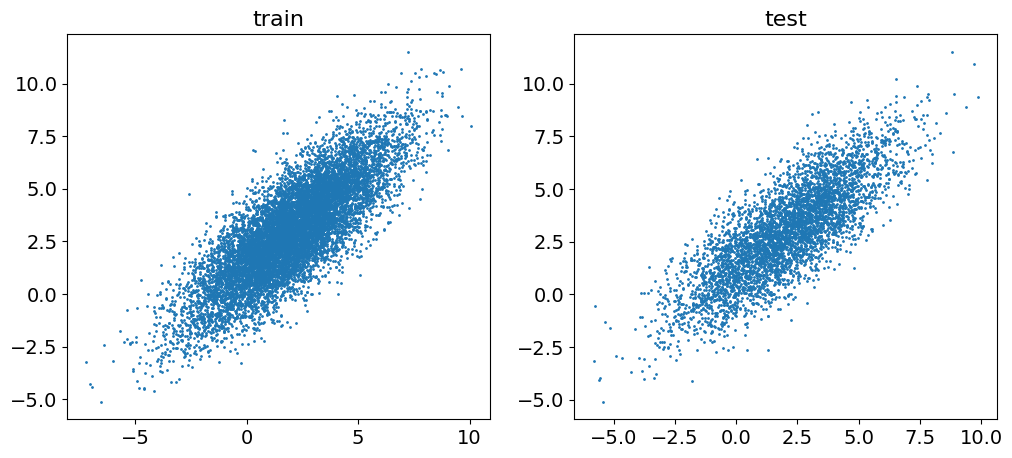

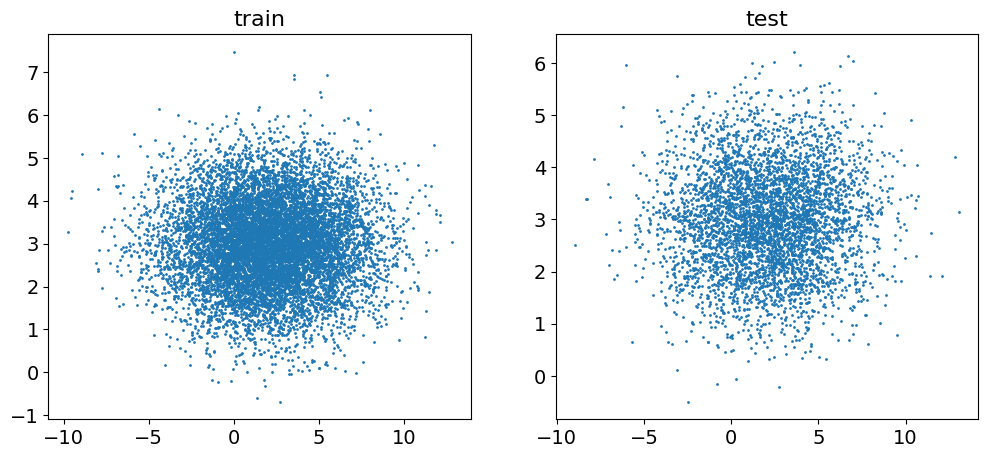

In [5]:
COUNT = 15000

train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

The difference of these two cases is the form of covariance matrix $\boldsymbol{\Sigma}$.

In multivariate case the matrix is non-diagonal, in univariate case it is strictly diagonal. As you will see, our VAE model will have absolutely different results for these datasets.

Now it is time to define our model. Our model will have the following structure:

* The latent dimensionality is equal to 2, the same as the data dimensionality ($\mathbf{z} \in \mathbb{R}^2$, $\mathbf{x} \in \mathbb{R}^2$).
* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. 
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We will consider only diagonal covariance matrices $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$, $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$.

Model objective is ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.

To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, I)$.

Let start with the helper functions.

In [6]:
from torch.distributions.normal import Normal
from torch.distributions.kl import kl_divergence

def get_normal_KL(mean_1, log_std_1, mean_2=None, log_std_2=None):
    """
        This function should return the value of KL(p1 || p2),
        where p1 = Normal(mean_1, exp(log_std_1)), p2 = Normal(mean_2, exp(log_std_2) ** 2).
        If mean_2 and log_std_2 are None values, we will use standard normal distribution.
        Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    # ====
    # your code
    p_1 = Normal(mean_1.float(), torch.exp(log_std_1))
    p_2 = Normal(mean_2.float(), torch.exp(log_std_2))

    return kl_divergence(p_1 , p_2)
    # ====

def test_KL():
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)).numpy(), 200.2144, rtol=1e-3)
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)).numpy(), 1.50925, rtol=1e-3)
    assert np.allclose(get_normal_KL(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), [49.2990, 1498.479], rtol=1e-3)


test_KL()

In [7]:
def get_normal_nll(x, mean, log_std):
    """
        This function should return the negative log likelihood log p(x),
        where p(x) = Normal(x | mean, exp(log_std) ** 2).
        Note that we consider the case of diagonal covariance matrix.
    """
    # ====
    # your code
    p = Normal(mean, torch.exp(log_std))
    return -p.log_prob(x)
    # ====


def test_NLL():
    assert np.isclose(get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(), 3.9189, rtol=1e-3)
    assert np.isclose(get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(), 6.9191, rtol=1e-3)
    assert np.allclose(get_normal_nll(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), np.array([3.9982, 5.9197]), rtol=1e-3)


test_NLL()

We will use simple fully connected dense networks for encoder and decoder.

In [8]:
import math

class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens

        model = []

        # ====
        # your code 
        # stack Dense layers with ReLU activation
        # note: you do not have to add relu after the last dense layer
        input_size = self.input_shape + (self.hiddens[0], )
        output_size = (self.hiddens[-1], ) + self.output_shape
        model.extend([nn.Linear(*input_size), nn.ReLU()])
        for i in range(len(self.hiddens) - 1):
            model.extend([nn.Linear(self.hiddens[i], self.hiddens[i + 1]), nn.ReLU()])
        model.append(nn.Linear(*output_size))
        # ====
        self.net = nn.Sequential(*model)

    def forward(self, x):
        # ====
        # your code
        # apply network that was defined in __init__ and return the output
        return self.net(x)
        # ====

####### TEST #######
test_model = FullyConnectedMLP(15, [45, 1, 3], 2)
test_model

FullyConnectedMLP(
  (net): Sequential(
    (0): Linear(in_features=15, out_features=45, bias=True)
    (1): ReLU()
    (2): Linear(in_features=45, out_features=1, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1, out_features=3, bias=True)
    (5): ReLU()
    (6): Linear(in_features=3, out_features=2, bias=True)
  )
)

Now it is time to implement the VAE model.

In [134]:
class VAE2d(nn.Module):
    def __init__(self, n_in, n_latent, enc_hidden_sizes, dec_hidden_sizes):
        assert isinstance(enc_hidden_sizes, list)
        assert isinstance(dec_hidden_sizes, list)
        super().__init__()
        self.n_latent = n_latent

        # ====
        # your code
        # define encoder and decoder networks
        # the encoder takes n_in elements, has enc_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_latent (n_latent for means, and n_latent for std)
        # the decoder takes n_latent elements, has dec_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_in (n_in for means, and n_in for std)
        self.encoder = FullyConnectedMLP(n_in, enc_hidden_sizes, 2* self.n_latent)
        self.decoder = FullyConnectedMLP(self.n_latent, dec_hidden_sizes, 2 * n_in)
        # ====

    def prior(self, n):
        # ====
        # your code
        # return n samples from prior distribution (we use standard normal for prior)
        return Normal(.0, .1).sample([n]).cuda()
        # ====

    def forward(self, x):
        # ====
        # your code
        # now you have to return from the model 
        # - mu_z - means for variational distribution 
        # - mu_x - means for generative distribution
        # - log_std_z - logarithm of std for variational distribution
        # - log_std_x - logarithm of std for generative distribution
        # we use logarithm, since the std is always positive
        # to get std we will exponentiate it to get rid of this constraint

        # 1) mu_z, log_std_z are outputs from the encoder
        # 2) apply reparametrization trick to get z (input of decoder)
        # (do not forget to use self.prior())
        # 3) mu_x, log_std_x are outputs from the decoder
        #    Note: [mu, log_std = decoder(input).chunk(2, dim=1)]
        mu_z, log_std_z = self.encoder(x).chunk(2, dim=1)
        z = torch.exp(log_std_z) * self.prior(self.n_latent) + mu_z
        mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)
        # ====
        return mu_z, log_std_z, mu_x, log_std_x

    def loss(self, x):
        mu_z, log_std_z, mu_x, log_std_x = self(x)
        # ====
        # your code
        # 1) apply model to get mu_z, log_std_z, mu_x, log_std_x
        # 2) compute reconstruction loss using get_normal_nll (it is the first term in ELBO)
        # 3) compute KL loss using get_normal_KL (it is the second term in ELBO)
        recon_loss = get_normal_nll(x, mu_x, log_std_x).sum()
        kl_loss= get_normal_KL(mu_z, log_std_z).sum()
        # ====

        return {
            'elbo_loss': recon_loss + kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n, sample_from_decoder=True):
        with torch.no_grad():
            # ====
            # your code
            # to sample from VAE model you have to sample from prior
            # and then apply decoder to prior samples.
            # parameter noise indicates whether to sample from decoder
            # or just use means of generative distribution as samples
            # 1) generate prior samples
            # 2) apply decoder
            # 3) sample from the decoder distribution if sample_from_decoder=True
            priors = torch.stack([self.prior(self.n_latent) for _ in range(n)])
            mu_z, log_std_z = self.decoder(priors).chunk(2, dim=1)
            if sample_from_decoder:
                z = Normal(mu_z, torch.exp(log_std_z)).sample([n])
            else:
                z = mu_z
            # ====
        return z.cpu().numpy()

######## TEST ########
test_vae2d = VAE2d(2, 2, [2, 2], [2, 2]).cuda()
batch = next(iter(data.DataLoader(test_data, batch_size=10, shuffle=True))).cuda()
test_vae2d(batch)
test_vae2d.loss(batch)
test_vae2d.sample(10, sample_from_decoder=False).shape

(10, 2)

We will use the following function for training our models. Look carefully, do not change.

In [135]:
def solve_task(train_data, test_data, model, batch_size, epochs, lr, use_cuda=False, use_tqdm=False):
    train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

    train_losses, test_losses = train_model(
        model, train_loader, test_loader, epochs=EPOCHS, lr=LR, use_cuda=use_cuda, use_tqdm=use_tqdm, loss_key='elbo_loss'
    )
    samples_noise = model.sample(3000, sample_from_decoder=True)
    samples_nonoise = model.sample(3000, sample_from_decoder=False)

    for key, value in test_losses.items():
        print('{}: {:.4f}'.format(key, value[-1]))

    plot_training_curves(train_losses, test_losses)
    visualize_2d_samples(samples_noise, title='Samples with Decoder Noise')
    visualize_2d_samples(samples_nonoise, title='Samples without Decoder Noise')

In [143]:
# ====
# your code
# choose these parameters (2 hidden layers could be enough for encoder and decoder)
ENC_HIDDEN_SIZES = [3, 6]
DEC_HIDDEN_SIZES = [6, 3]
BATCH_SIZE = 128 # any adequate value
EPOCHS = 10     # < 10
LR = 1e-2         # < 1e-2
# ====

COUNT = 10000

Firstly, we will train the VAE model for multivariate gaussian distribution.

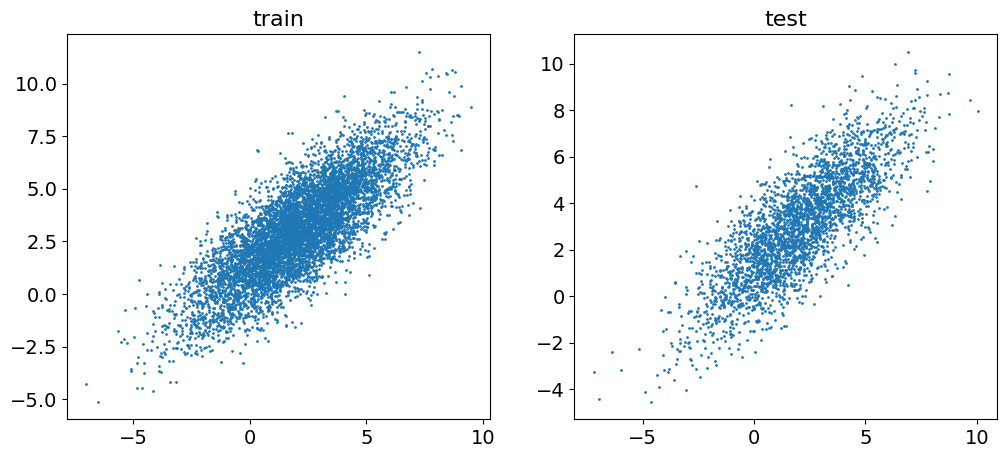

elbo_loss: 336.1184
recon_loss: 313.6583
kl_loss: 22.4601


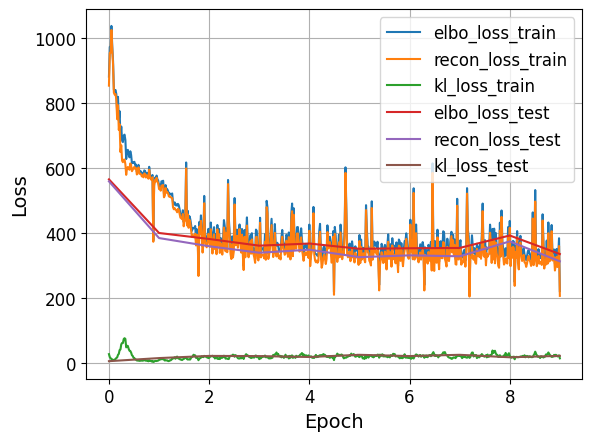

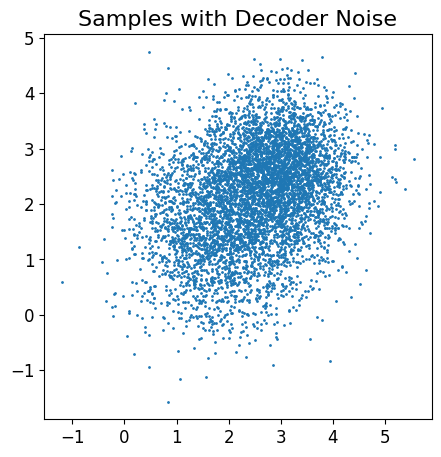

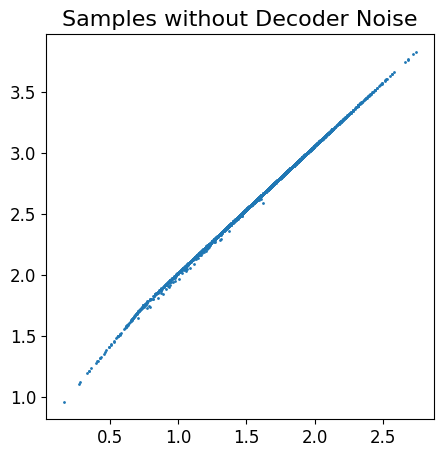

In [148]:
train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES)
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

To analyze our models we will use the following function. Look carefully, do not change.

This function calculates the mean $\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x})$, and covariances $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ of the variational posterior distribution $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$.

In [149]:
def get_latent_stats(model, test_data, use_cuda=True, batch_size=3000):
    batch = next(iter(data.DataLoader(test_data, batch_size=batch_size, shuffle=True)))
    if use_cuda:
        batch = batch.cuda()

    with torch.no_grad():
        mu_z, log_std_z = model(batch)[:2]
        
    mu_z = mu_z.cpu().numpy()
    std_z = log_std_z.exp().cpu().numpy()

    return mu_z, std_z

In [150]:
# just look at these numbers and read the comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [-0.16506355  0.0119637 ] +- [0.49620128 0.14688787]
std_z =  [0.84071076 0.9690881 ] +- [0.03690635 0.0219344 ]


Secondly, we will train the VAE model for univariate gaussian distribution.

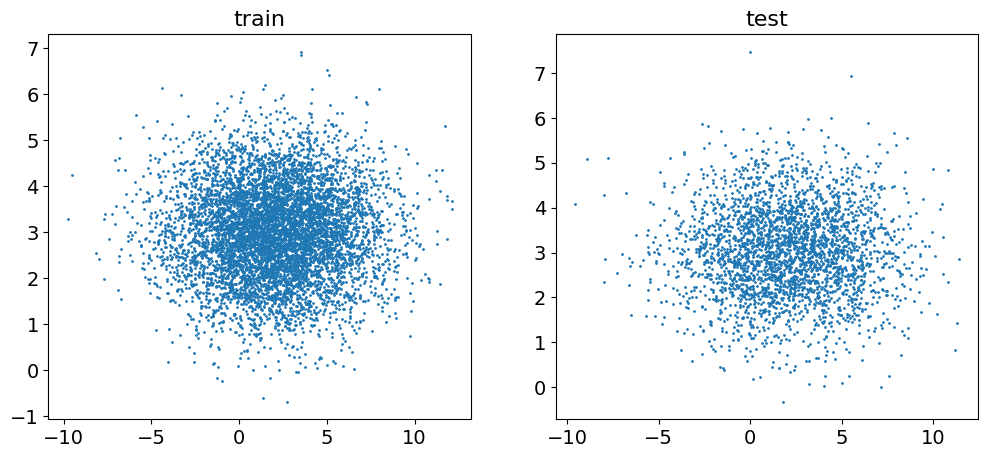

elbo_loss: 454.0780
recon_loss: 447.1011
kl_loss: 6.9769


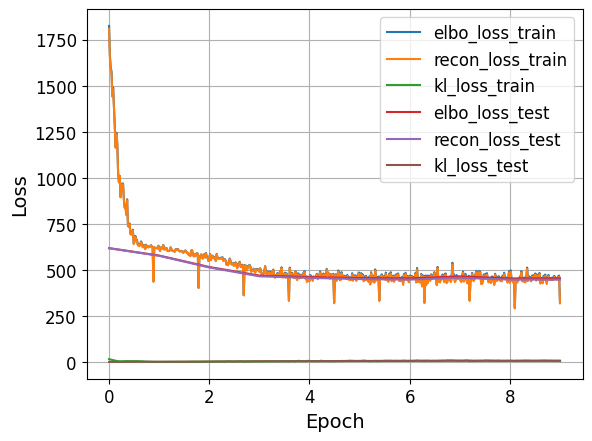

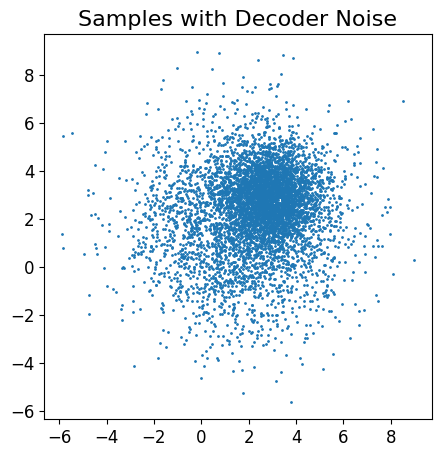

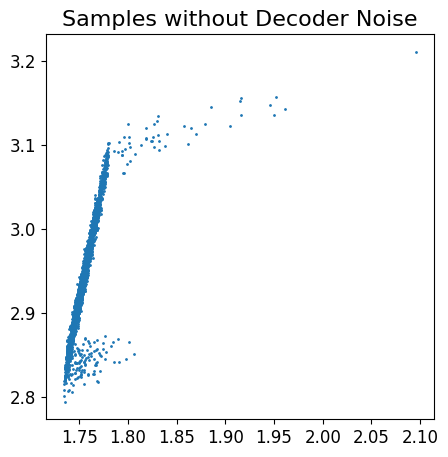

In [163]:
train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES).cuda()
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

In [164]:
# just look at these numbers and read comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [0.00213564 0.02388615] +- [0.01327307 0.32334578]
std_z =  [1.0003278  0.95604515] +- [0.00022803 0.01985231]


After training the VAE model on these 2 datasets, have a look at "Samples without Decoder Noise" figures. These figures show the means $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. In the case of multivariate gaussian, the means are perfectly aligned with the data distribution. 
Otherwise, you have to see the strange figure in the univariate gaussian case . This happens due to so called **posterior collapse** (we will discuss it at the one of our lectures).

To be brief, the reason is the following. Our posterior distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$ is a univariate (covariance matrix is diagonal). Thus, the model does not need latent variable since the data distribution is also univariate. In this case VAE ignores latent variable, cause the model fits the distribution without any information from latent space.

If the decoder ignores latent variable, the second term in ELBO (KL) could be low (variational posterior distribution, which is given by encoder model, is close to prior distribution for each datapoint). In the training curves you have to see that KL loss behaves differently in these two cases.

The mean and std of variational posterior distribution also proves this concept. For the second case you have to see that mean is almost zero and std is almost one.

It is a real problem for generative models and we will discuss later how to overcome it.

## Task 3: VAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset. 

Download the data from [here](https://drive.google.com/file/d/1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj/view?usp=sharing) (you could use the cell below).

In [153]:
!gdown --id 1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj

C:\Users\MuchachosD\Documents\Projects\MMTA FALL 2022\venv\lib\site-packages\gdown\cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj
To: C:\Users\MuchachosD\Documents\Projects\DGM FALL 2022\cifar10.pkl

  0%|          | 0.00/185M [00:00<?, ?B/s]
  1%|          | 1.05M/185M [00:00<00:36, 5.10MB/s]
  1%|1         | 2.10M/185M [00:00<00:32, 5.69MB/s]
  2%|1         | 3.15M/185M [00:00<00:35, 5.14MB/s]
  2%|1         | 3.67M/185M [00:00<00:35, 5.05MB/s]
  2%|2         | 4.19M/185M [00:00<00:36, 4.98MB/s]
  3%|2         | 4.72M/185M [00:00<00:37, 4.86MB/s]
  3%|2         | 5.24M/185M [00:01<00:36, 4.91MB/s]
  3%|3         | 5.77M/185M [00:01<00:36, 4.84MB/s]
  4%|3         | 6.82M/185M [00:01<00:36, 4.86MB/s]
  4%|3         | 7.34M/185M [00:01<00:36, 4.81MB/s]
  4%|4         | 7.86M/185M 

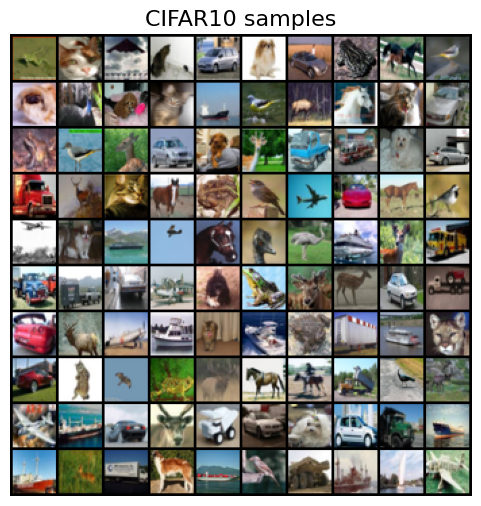

In [167]:
train_data, test_data = load_pickle('content/cifar10.pkl', flatten=False, binarize=False)
visualize_images(train_data, 'CIFAR10 samples')

Here the model specification will be almost the same (as in Task 2) with the following differences:
* Now our encoder and decoder will be convolutional.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$ as model samples.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. We will discuss the choice of this parameter later in the course. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

Let define our convolutional encoder and decoder.

In [ ]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # your code
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture
        
        # ====

    def forward(self, x):
        # ====
        # your code
        # 1) apply convs
        # 2) reshape the output to 2d matrix for last fc layer
        # 3) apply fc layer
        
        # ====
        return mu, log_std
        

class ConvDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        # ====
        # your code
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu 
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        
        # ====

    def forward(self, z):
        # ====
        # your code
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor 
        # 3) apply conv layers
        
        # ====
        return out

Now it is time to implement VAE model for image dataset.

In [ ]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape, n_latent, beta=1):
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta
        # ====
        # your code
        # define encoder with input size input_shape and output dim n_latent
        # define decoder with input dim n_latent and output size input_shape
        
        # ====

    def prior(self, n, use_cuda=True):
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)
        
        # ====
        if use_cuda:
            z = z.cuda()
        return z

    def forward(self, x):
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        
        # ====
        return mu_z, log_std_z, x_recon
        
    def loss(self, x):
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)
        
        # ==== 
        return {
            'elbo_loss': recon_loss + self.beta * kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n):
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder
            
            # ====
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE =  # any adequate value
EPOCHS =      # < 16
LR =          # < 1e-3
N_LATENS =    # 128 < _ < 1024
BETA =        # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model, 
    train_loader, 
    test_loader, 
    epochs=EPOCHS, 
    lr=LR, 
    loss_key='elbo_loss', 
    use_tqdm=True, 
    use_cuda=USE_CUDA, 
)
for key, value in test_losses.items():
    print('{}: {:.4f}'.format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

In [ ]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

if USE_CUDA:
    x = x.cuda()

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20].cuda()
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')